Installing packages in conda R environment:

`install.packages("clinfun", "/home/srikar/anaconda3/lib/R/library")`

so package is placed in correct library

#### Operating parameters for larotrectinib report 28 Dec 2018

In [1]:
#set working directory
#setwd("E:/Documents and Settings/Administrator/Desktop/xCures")

#read in necessary packages
library(BDP2)
library(Hmisc)
library(clinfun)

options(repr.plot.width=6, repr.plot.height=4)

Loading required package: rmarkdown
Loading required package: shiny
Loading required package: shinyBS

BDP2 0.1.3 loaded.
Use BDP2workflow() for interactive shiny app, see 'help("BDP2-package")' and vignette for more information.

Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, units



In [2]:
# pF	response rate used for the futility criterion P(p>pF|Data) < cF (may be identical to pE)
# cF	critical level of posterior probabilities used for declaring futility, vector if x=="cF"
# pE	response rate used for the efficacy criterion P(p>pE|Data) >= cE
# cE	critical level of posterior probabilities used for declaring efficacy, vector if x=="cE"
# p0	response rate corresponding to H0
# p1	response rate corresponding to H1 (p1 > p0)
# shape1F	first parameter of the Beta prior for futility analysis
# shape2F	second parameter of the Beta prior for futility analysis
# shape1E	first parameter of the Beta prior for efficacy analysis
# shape2E	second parameter of the Beta prior for efficacy analysis

# Dave's original parameters
#parameterize the models from the analysis plan 
p0=0.3
p1=0.5

#minimize the probability of stopping trials for failure
pF=0.01
#pE=0.75 (reported in NEJM paper)
pE=0.3 #conservative response rate

#beta priors
shape1F=0.3
shape2F=0.7
shape1E=0.001
shape2E=0.001

#probability of stopping for futility and efficacy
cF=0.90
cE=0.975

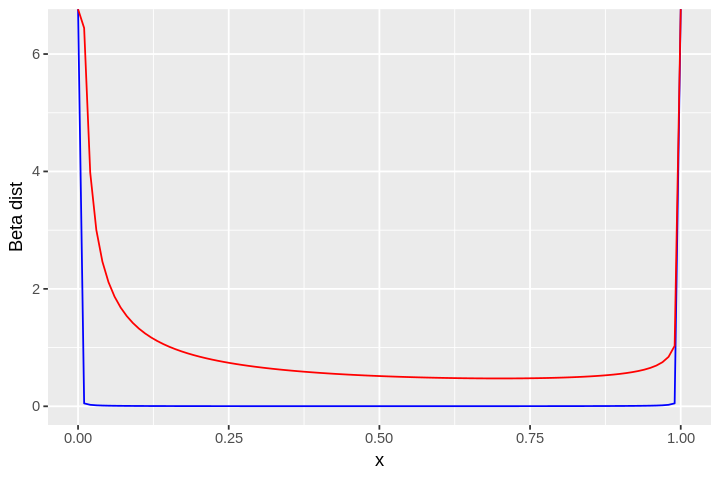

In [3]:
# Print the prior plots
require(ggplot2)
x <- seq(0,1,length=100)
dbE <- dbeta(x, shape1E, shape2E)
dbF <- dbeta(x, shape1F, shape2F)
#qplot(x, db, geom="line")

p = qplot() + 
  geom_line(aes(x = x, y = dbE), color = "blue") +
  geom_line(aes(x = x, y = dbF), color = "red") +
  xlab('x') +
  ylab('Beta dist')

print(p)

 I think this is the official sample size portion of the analysis plan from protocol. 
([page 736](https://www.nejm.org/doi/suppl/10.1056/NEJMoa1714448/suppl_file/nejmoa1714448_protocol.pdf))
 
#### SAMPLE SIZE CONSIDERATIONS 
Under the planned primary analysis of effectiveness, a true ORR of >= 50% 
is hypothesized when larotrectinib is administered to patients with NTRK fusion cancers. A sample 
size of 55 patients is estimated to provide 80% power to achieve a lower boundary of a 2-sided 95% 
exact binomial confidence interval (CI) about the estimated ORR that exceeds 30%. Pediatric and 
adult patients with NTRK fusion cancers who are enrolled in Studies 14001, 15002, and 15003 will 
contribute to the primary analysis (see Section 5.1). Ruling out a lower limit of 30% for ORR is 
considered clinically meaningful and consistent with the estimated response rates seen with approved 
targeted therapies in genetically-defined patient populations who have failed prior therapies. Under the primary analysis, the lower limit of the 95% CI will exceed 30% when the estimated ORR is 46% or greater **(Clopper-Pearson method)**

**ph2single**

From clinfun v1.0.15

Exact single stage Phase II design

Calculates the exact one stage Phase II design

Usage

ph2single(pu,pa,ep1,ep2,nsoln=5)

Arguments:
- pu: unacceptable response rate
- pa: response rate that is desirable
- ep1: threshold for the probability of declaring drug desirable under p0
- ep2: threshold for the probability of rejecting the drug under p1
- nsoln: number of designs with given alpha and beta

Value:
ph2single returns a data frame with variables: n, r, and the Type I and Type II errors. 
Treatment desirable if >r responses seen. 


In [4]:
#reproduce/confirm sample size estimates from the protocol, 80% power, two-sided 0.05
ph2single(0.3,0.5,0.025,0.2,nsoln=10)

n,r,Type I error,Type II error
47,20,0.02347653,0.1908467
49,21,0.01945024,0.1958015
52,22,0.02085060,0.1658749
54,23,0.01733141,0.1704455
55,23,0.02217036,0.1403049
56,24,0.01440788,0.1748410
57,24,0.01848318,0.1446219
58,24,0.02341060,0.1185236
58,25,0.01197900,0.1790717
59,25,0.01540848,0.1487976


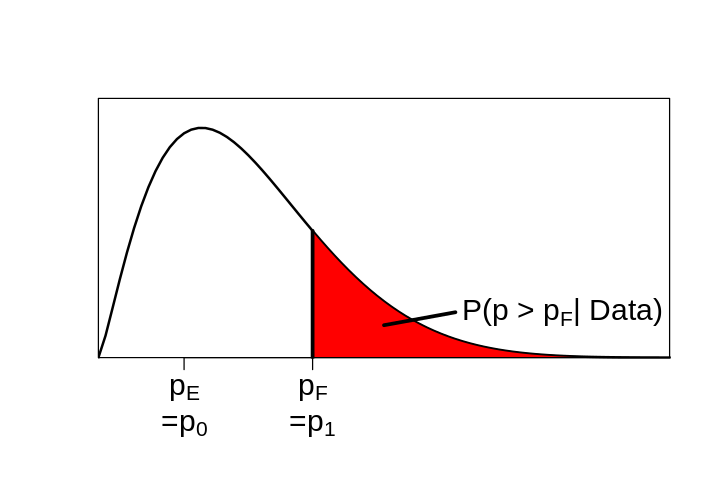

In [5]:
##plot PF, the posterior probability distribution for futility, upper tail (not useful)
plot(function(x) x,0,0.8,add=F,type="n",col="black",xlab="",ylab="",xaxt="n",yaxt="n",ylim=c(0,4), cex.axis=1.5,cex.lab=1.5,xaxs='i',yaxs='i')
plot(function(x) dbeta(x,shape1F+2,shape2F+8),add=T,col="black",lwd=2,lty=1)
xy <- seq(0.3,1,length=1000)
fxy <- dbeta(xy,shape1F+2,shape2F+8)
xyx <- c(1,0.3,xy)
yyx <- c(0.0001,0.0001,fxy)
polygon(xyx,yyx,col='red')
lines(c(0.3,0.3),c(0,dbeta(0.3,shape1F+2,shape2F+8)),lwd=3)
axis(side=1,at=c(0.12,0.3),label=c(expression(p[E]),expression(p[F])),cex.axis=1.5)
axis(side=1,at=c(0.12,0.3),label=c(expression(paste("=",p[0])),expression(paste("=",p[1]))),cex.axis=1.5,line=1.5,lty=0)
text(0.65,0.7,labels=expression(paste("P(p > ",p[F],"| Data)")),cex=1.5)
lines(c(0.4,0.5),c(0.5,0.7),lwd=3)

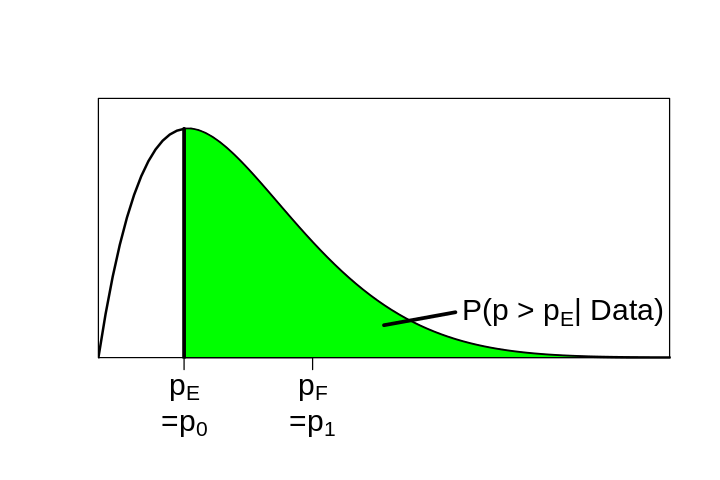

In [6]:
##plot PE, the posterior probability distribution for efficacy, upper tail (not included)
plot(function(x) x,0,0.8,add=F,type="n",col="black",xlab="",ylab="",xaxt="n",yaxt="n",ylim=c(0,4),
     cex.axis=1.5,cex.lab=1.5,xaxs='i',yaxs='i')
plot(function(x) dbeta(x,shape1E+2,shape2E+8),add=T,col="black",lwd=2,lty=1)
xy <- seq(0.12,1,length=1000)
fxy <- dbeta(xy,shape1E+2,shape2E+8)
xyx <- c(1,0.12,xy)
yyx <- c(0.0001,0.0001,fxy)
polygon(xyx,yyx,col='green')
lines(c(0.12,0.12),c(0,dbeta(0.12,shape1E+2,shape2E+8)),lwd=3)
axis(side=1,at=c(0.12,0.3),label=c(expression(p[E]),expression(p[F])),cex.axis=1.5)
axis(side=1,at=c(0.12,0.3),label=c(expression(paste("=",p[0])),expression(paste("=",p[1]))),cex.axis=1.5,line=1.5,lty=0)
text(0.65,0.7,labels=expression(paste("P(p > ",p[E],"| Data)")),cex=1.5)
lines(c(0.4,0.5),c(0.5,0.7),lwd=3)

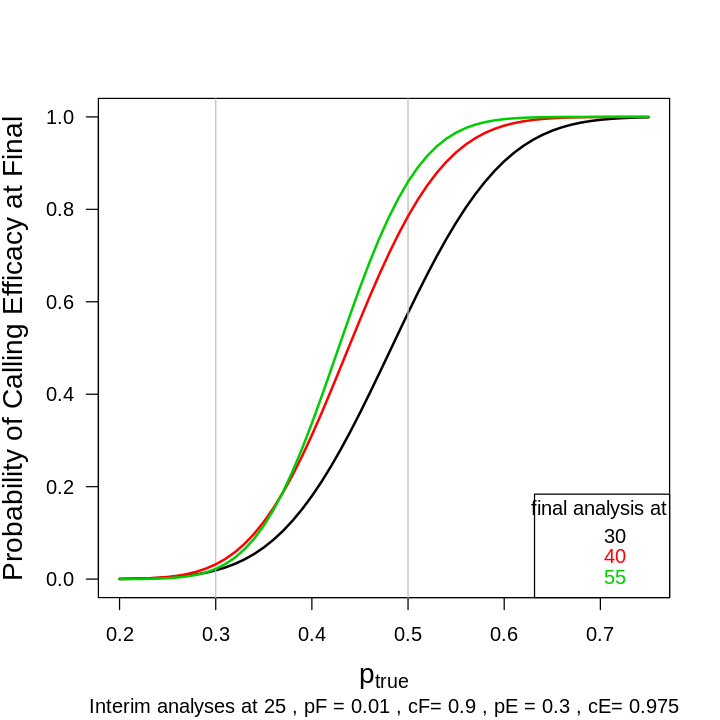

In [7]:
options(repr.plot.width=6, repr.plot.height=6)
#initial graph, final N = 30 with an interim at 25
n=30
#x axis limits
pvec=seq(0.20, 0.75, by=0.01)
#interim analysis
vn.int=25
#plot curve for interim analysis final analysis of N = 30
plotBDP2(x="ptrue",y="PEcall",n=n,interim.at=vn.int,pF=pF,cF=cF,pE=pE,cE=cE,ptrue=pvec,
         shape1F=shape1F,shape2F=shape2F,shape1E=shape1E,shape2E=shape2E,col=1,cex.lab=1.4)
abline(v=p0,col="grey")
abline(v=p1,col="grey")

#other curves for other final N
nvec=c(30,40,55)
interims.at= 30
for (jj in 2:length(nvec)) {
  n=nvec[jj]
  # vn.int=seq(0,n,by=input$interim.atEvery)[-1]
  # vn.int=vn.int[-length(vn.int)]
  vn.int=interims.at[interims.at<n]
  plotBDP2(x="ptrue",y="PEcall",n=n,interim.at=vn.int,pF=pF,cF=cF,pE=pE,cE=cE,ptrue=pvec,
           shape1F=shape1F,shape2F=shape2F,shape1E=shape1E,shape2E=shape2E,add=TRUE,col=jj)
}
legend("bottomright",title="final analysis at ",legend=nvec,text.col = 1:length(nvec))

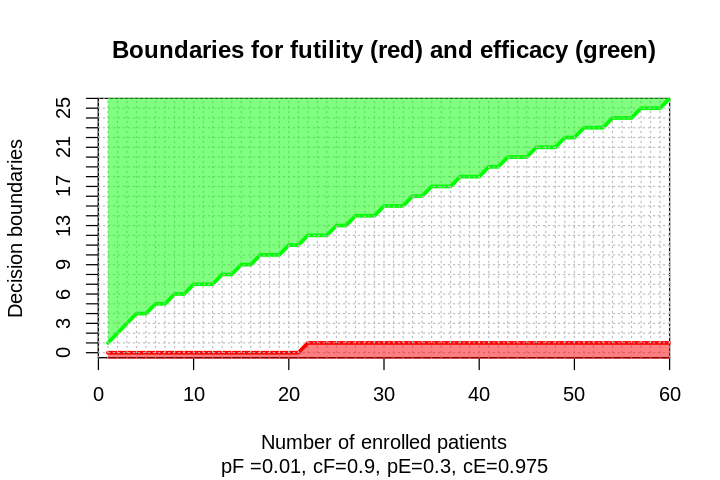

In [8]:
#stopping boundaries for futility (ignore) and efficacy (green)
n=60
options(repr.plot.width=6, repr.plot.height=4)
plotBDP2(x = "n", 
         y = "bFbE", 
         n=n,pF=pF,cF=cF,pE=pE,cE=cE,
         shape1F=shape1F,shape2F=shape2F,shape1E=shape1E,shape2E=shape2E,
         col=c("red","green"))

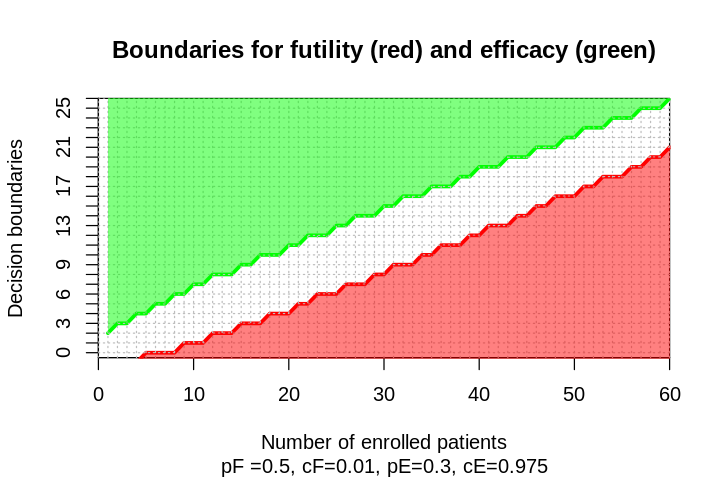

In [12]:
#parameterize the models from the analysis plan 
p0 = 0.3  # null hypo rate (Std of Care or historical)
p1 = 0.5  # 

#minimize the probability of stopping trials for failure
pE = p0  #conservative response rate = p0
pF = p1 # = p1

#beta priors
shape1E = pE # mean should be pE
shape2E = 1- shape1E

shape1F = pF # mean is pF
shape2F = 1 - shape1F

#probability of stopping for futility and efficacy
cF = 0.01
cE = 0.975

#stopping boundaries for futility (ignore) and efficacy (green)
n=60
options(repr.plot.width=6, repr.plot.height=4)
plotBDP2(x = "n", 
         y = "bFbE", 
         n=n,pF=pF,cF=cF,pE=pE,cE=cE,
         shape1F=shape1F,shape2F=shape2F,shape1E=shape1E,shape2E=shape2E,
         col=c("red","green"))